In [1]:
## The imports 
import numpy as np
from PIL import Image 
import cv2
from matplotlib import pyplot as plt

In [2]:
#The Defines
CHAR_PATH = 'images/char.tif'
D0 = 50

In [3]:
## Functions

def create_mask(D0, src, mask_type): # This function will be making the mask that we want just by passing the D0 parameter
    mask = np.zeros_like(src, float)
    if mask_type == "Gaussian":
        for i in range(mask.shape[0]):
            for j in range(mask.shape[1]):
                mask[i, j] = (np.exp(-1 * ((i - int(src.shape[0]/2 + 1)) * (i - int(src.shape[0]/2 + 1)) + (j - int(src.shape[1]/2 + 1)) * (j - int(src.shape[1]/2 + 1))) / (2 * D0 * D0))) / (2 * np.pi * D0 * D0)    
    elif mask_type == "Ideal":
        for i in range(mask.shape[0]):
            for j in range(mask.shape[1]):
                mask[i, j] = ((i - int(src.shape[0]/2 + 1)) * (i - int(src.shape[0]/2 + 1)) + (j - int(src.shape[1]/2 + 1)) * (j - int(src.shape[1]/2 + 1))) < (D0 * D0)
    return mask
        

In [4]:
# We read the image we have
Char_img = cv2.imread(CHAR_PATH, 0)
src = Char_img

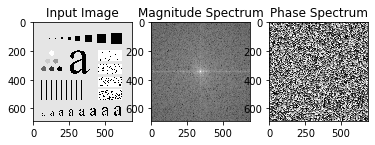

In [5]:
# We calculate the dft of the image and plot the magitude and phase
DFT = cv2.dft(np.float32(Char_img),flags = cv2.DFT_COMPLEX_OUTPUT)
DFT_shift = np.fft.fftshift(DFT)
Mag, Phase = cv2.cartToPolar(DFT_shift[:,:,0], DFT_shift[:,:,1], angleInDegrees=0)
# We plot the result
plt.subplot(131),plt.imshow(Char_img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(132), plt.imshow(20 * np.log(Mag), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.subplot(133), plt.imshow(Phase, cmap = 'gray')
plt.title('Phase Spectrum')
plt.show()

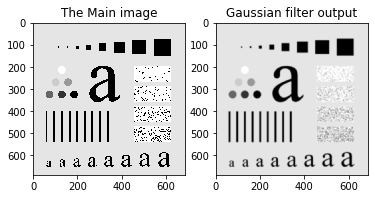

In [6]:
# In this part we apply the gaussian filter that we have eplemented with function
mask = create_mask(D0, src, "Gaussian")
after_filter = (mask * Mag)
rows, cols = src.shape
New_DFT_C = np.zeros((rows,cols,2),np.float32)
# We apply that filter to our image
New_DFT_C[:,:,0] = after_filter * np.cos(Phase)
New_DFT_C[:,:,1] = after_filter * np.sin(Phase)
f_ishift = np.fft.ifftshift(New_DFT_C)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# We plot the new imag we have
plt.subplot(121),plt.imshow(src, cmap = 'gray')
plt.title('The Main image')
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Gaussian filter output')
plt.show()

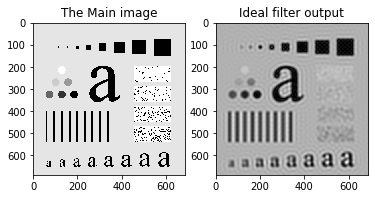

In [7]:
# In this part we apply the ideal filter that we have eplemented with function
mask = create_mask(35, src, "Ideal")
after_filter = (mask * Mag)
rows, cols = src.shape
New_DFT_C = np.zeros((rows,cols,2),np.float32)
# We apply that filter to our iamge
New_DFT_C[:,:,0] = after_filter * np.cos(Phase)
New_DFT_C[:,:,1] = after_filter * np.sin(Phase)
f_ishift = np.fft.ifftshift(New_DFT_C)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# We plot the new imag we have
plt.subplot(121),plt.imshow(src, cmap = 'gray')
plt.title('The Main image')
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Ideal filter output')
plt.show()

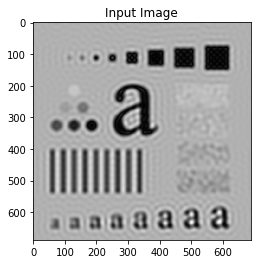

In [8]:
# We also plot in the ned
plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image')
plt.show()